In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# From spotify data Albert scraped

In [3]:
spotify_data = pd.read_csv('API Scraping Data/top5genres2020_2022.csv')

In [4]:
spotify_data.head()

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,100,2020,pop,0.707,0.681,0,-4.325,1,0.0668,0.0632,...,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4
1,92,2020,pop,0.644,0.728,8,-5.750,1,0.0351,0.0543,...,0.1610,0.430,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4
2,91,2020,pop,0.644,0.735,8,-5.747,1,0.0391,0.0521,...,0.1610,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4
3,90,2020,pop,0.561,0.520,11,-9.342,0,0.2440,0.0503,...,0.3550,0.424,153.150,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3
4,90,2020,pop,0.684,0.607,11,-8.127,0,0.1000,0.0267,...,0.1910,0.498,81.001,audio_features,0JXXNGljqupsJaZsgSbMZV,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://api.spotify.com/v1/tracks/0JXXNGljqups...,https://api.spotify.com/v1/audio-analysis/0JXX...,195373,4


In [5]:
# baseline model with predictors

In [6]:
baseline_model = smf.ols(formula='popularity~speechiness+danceability+energy+valence+genre+loudness+acousticness+instrumentalness+liveness+tempo', data=spotify_data).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1678.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:08:30   Log-Likelihood:                -64280.
No. Observations:               14990   AIC:                         1.286e+05
Df Residuals:                   14976   BIC:                         1.287e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.0069      1.765      8.502      0.000      11.547      18.467
genre[T.hip hop]     1.0890      0.493      2.208      0.027       0.122       2.056
genre[T.pop]        42.1335      0.470     89.579      0.000      41.212      43.055
genre[T.rap]        46.2638      0.488     94.726      0.000      45.306      47.221
genre[T.rock]       43.2392      0.493     87.629      0.000      42.272      44.206
speechiness          4.7749      1.395      3.422      0.001       2.040       7.510
danceability        -1.9797      1.246     -1.589      0.112      -4.422       0.462
energy               8.4454      1.380      6.121      0.000       5.741      11.150
valence             -2.9463      0.756     -3.896      0.000      -4.428      -1.464
loudness            -0.4340      0.076     -5.683      0.000      -0.584      -0.284
acousticness         2.6796      0.784      3.418      0.001       1.143       4.216
instrumentalness     2.5355      1.306      1.942      0.052      -0.023       5.094
liveness            -0.0850      1.041     -0.082      0.935      -2.126       1.956
tempo                0.0155      0.005      3.007      0.003       0.005       0.026
==============================================================================
Omnibus:                     5923.759   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27650.570
Skew:                          -1.896   Prob(JB):                         0.00
Kurtosis:                       8.467   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
model = smf.ols(formula='popularity~speechiness+(danceability*energy)+valence+loudness+genre+(acousticness*instrumentalness)+I(liveness**2)+tempo', data=spotify_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     1469.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:08:30   Log-Likelihood:                -64234.
No. Observations:               14990   AIC:                         1.285e+05
Df Residuals:                   14974   BIC:                         1.286e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.6347      2.878     -1.611      0.107     -10.275       1.006
genre[T.hip hop]                  1.1549      0.492      2.348      0.019       0.191       2.119
genre[T.pop]                     42.2581      0.469     90.065      0.000      41.338      43.178
genre[T.rap]                     46.0957      0.487     94.558      0.000      45.140      47.051
genre[T.rock]                    42.8380      0.494     86.720      0.000      41.870      43.806
speechiness                       3.3914      1.401      2.421      0.016       0.645       6.138
danceability                     28.6265      3.812      7.509      0.000      21.154      36.099
energy                           38.2286      3.779     10.116      0.000      30.821      45.636
danceability:energy             -46.8887      5.520     -8.494      0.000     -57.709     -36.068
valence                          -2.5673      0.755     -3.401      0.001      -4.047      -1.088
loudness                         -0.4714      0.076     -6.179      0.000      -0.621      -0.322
acousticness                      4.4137      0.807      5.470      0.000       2.832       5.995
instrumentalness                  6.4092      1.630      3.932      0.000       3.214       9.604
acousticness:instrumentalness   -15.9465      4.090     -3.899      0.000     -23.964      -7.929
I(liveness ** 2)                 -0.3992      1.492     -0.268      0.789      -3.323       2.525
tempo                             0.0123      0.005      2.390      0.017       0.002       0.022
==============================================================================
Omnibus:                     5862.976   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27005.413
Skew:                          -1.879   Prob(JB):                         0.00
Kurtosis:                       8.396   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
predicted_popularity = model.predict(spotify_data)
rmse = np.sqrt(((predicted_popularity-spotify_data['popularity'])**2).mean())

In [9]:
rmse

17.569958962767938

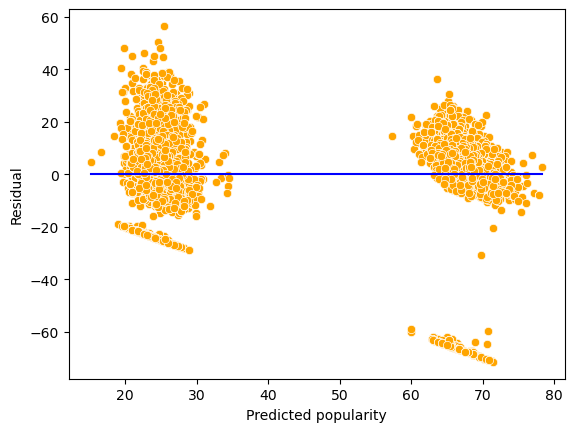

In [10]:
sns.scatterplot(x=model.fittedvalues, y=model.resid, color='orange')
sns.lineplot(x=[predicted_popularity.min(),predicted_popularity.max()], y=[0,0],color='blue')
plt.xlabel('Predicted popularity')
plt.ylabel('Residual')
plt.show()

# From Kaggle data

In [11]:
y1950 = pd.read_csv('Kaggle Data/1950.xls')
y1960 = pd.read_csv('Kaggle Data/1960.xls')
y1970 = pd.read_csv('Kaggle Data/1970.xls')
y1980 = pd.read_csv('Kaggle Data/1980.xls')
y1990 = pd.read_csv('Kaggle Data/1990.xls')
y2000 = pd.read_csv('Kaggle Data/2000.xls')
y2010 = pd.read_csv('Kaggle Data/2010.xls')

In [12]:
y1950['decade'] = 1950
y1960['decade'] = 1960
y1970['decade'] = 1970
y1980['decade'] = 1980
y1990['decade'] = 1990
y2000['decade'] = 2000
y2010['decade'] = 2010

In [13]:
all_data = pd.concat([y1950,y1960,y1970,y1980,y1990,y2000,y2010])
all_data.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,decade
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72,1950
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,1950
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61,1950
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60,1950
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60,1950


In [14]:
all_data.corrwith(all_data['pop'])

Number   -0.519745
year      0.160467
bpm       0.066558
nrgy      0.271798
dnce      0.249302
dB        0.365172
live     -0.036505
val      -0.102418
dur       0.280501
acous    -0.455239
spch      0.192929
pop       1.000000
decade    0.661528
dtype: float64

In [15]:
all_data.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,decade
Number,1.000000,0.122851,0.030950,0.174730,0.046153,0.042841,0.046433,0.089254,0.058410,-0.074355,-0.059867,-0.519745,0.071529
year,0.122851,1.000000,-0.020790,0.195329,0.273865,0.422602,-0.001603,-0.087055,-0.099655,-0.241289,0.193292,0.160467,0.580309
bpm,0.030950,-0.020790,1.000000,0.179329,-0.057710,0.044748,0.009960,0.084723,0.038277,-0.175530,0.059116,0.066558,0.060434
nrgy,0.174730,0.195329,0.179329,1.000000,0.331962,0.702543,0.132563,0.405190,0.131228,-0.665900,0.178491,0.271798,0.428114
dnce,0.046153,0.273865,-0.057710,0.331962,1.000000,0.295534,-0.069818,0.454714,0.053011,-0.382297,0.207741,0.249302,0.398135
dB,0.042841,0.422602,0.044748,0.702543,0.295534,1.000000,0.083423,0.136813,0.026851,-0.504551,0.200195,0.365172,0.561361
live,0.046433,-0.001603,0.009960,0.132563,-0.069818,0.083423,1.000000,0.060542,-0.067533,-0.056394,0.091595,-0.036505,-0.025042
val,0.089254,-0.087055,0.084723,0.405190,0.454714,0.136813,0.060542,1.000000,-0.118664,-0.196375,0.053817,-0.102418,-0.128770
dur,0.058410,-0.099655,0.038277,0.131228,0.053011,0.026851,-0.067533,-0.118664,1.000000,-0.227505,0.045265,0.280501,0.262528
acous,-0.074355,-0.241289,-0.175530,-0.665900,-0.382297,-0.504551,-0.056394,-0.196375,-0.227505,1.000000,-0.172820,-0.455239,-0.581004


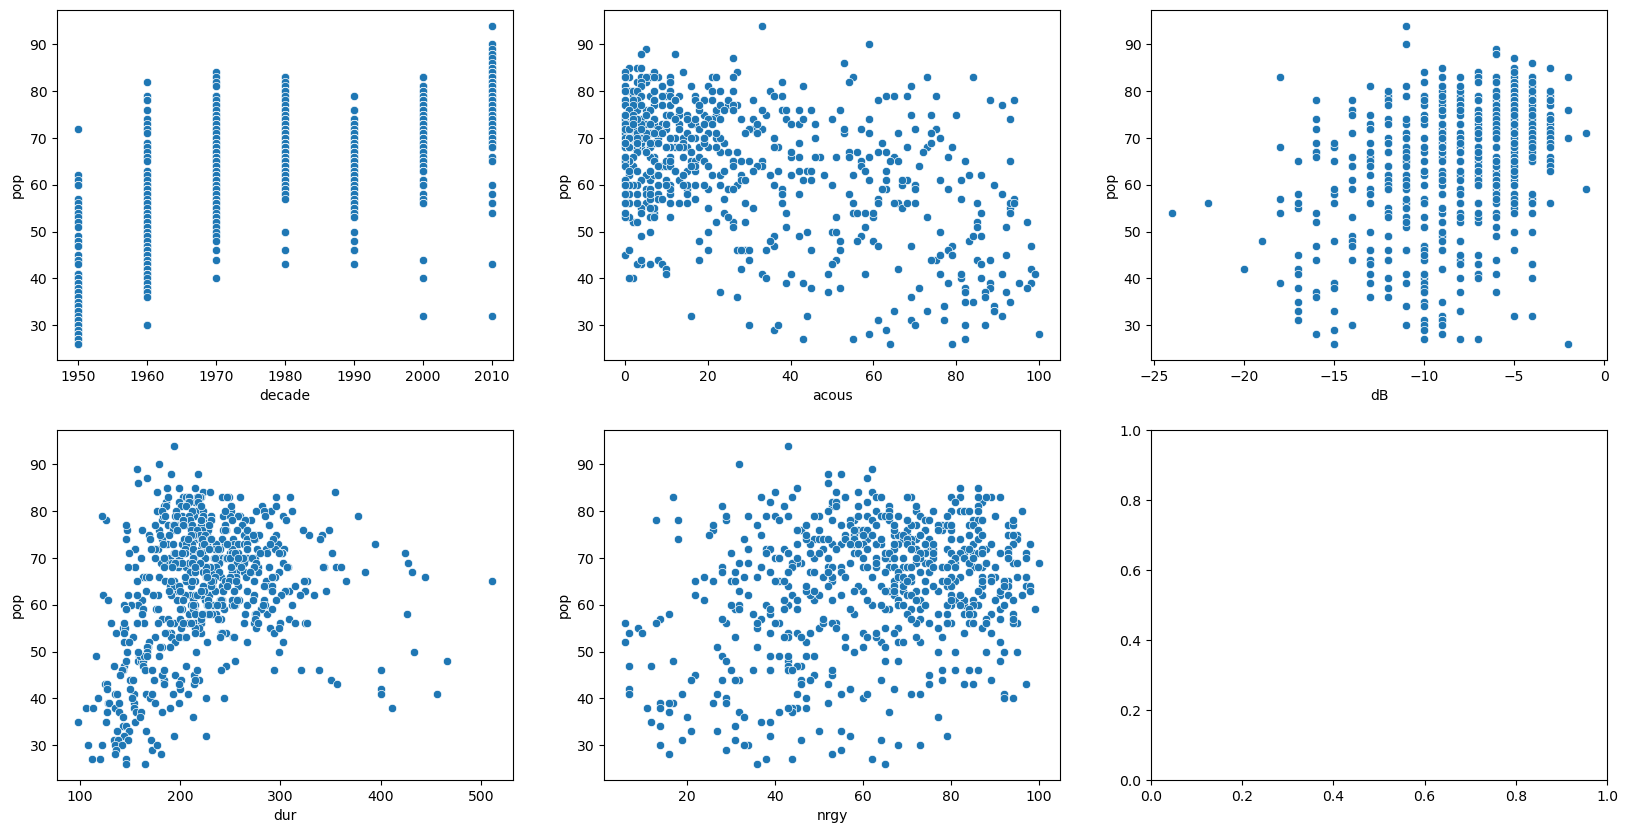

In [16]:
# pop and decade; pop and acous, pop and dB, pop and dur,  pop and nrgy?
predictors = ['decade','acous','dB','dur','nrgy']
fig, axes = plt.subplots(2,3,figsize=(20,10))
p = 0
for i in range(2):
    for j in range(3):
        
        if p >= 5:
            break
        predictor = predictors[p]
        
        sns.scatterplot(ax=axes[i,j], x=predictor,y='pop',data=all_data)
        p+=1
plt.show()

In [46]:
model = smf.ols(formula='pop~acous+dB+dur+nrgy', data=all_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     70.80
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           6.42e-50
Time:                        23:39:47   Log-Likelihood:                -2574.2
No. Observations:                 667   AIC:                             5158.
Df Residuals:                     662   BIC:                             5181.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.6534      3.748     21.252      0.000      72.294      87.013
acous         -0.1982      0.021     -9.349      0.000      -0.240      -0.157
dB             1.2797      0.173      7.404      0.000       0.940       1.619
dur            0.0488      0.008      6.319      0.000       0.034       0.064
nrgy          -0.1728      0.034     -5.150      0.000      -0.239      -0.107
==============================================================================
Omnibus:                        7.883   Durbin-Watson:                   0.546
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.015
Skew:                          -0.268   Prob(JB):                       0.0182
Kurtosis:                       2.959   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
pred_pop = model.predict(all_data)
rmse =  np.sqrt(((pred_pop-all_data['pop'])**2).mean())
rmse

10.058444849020319

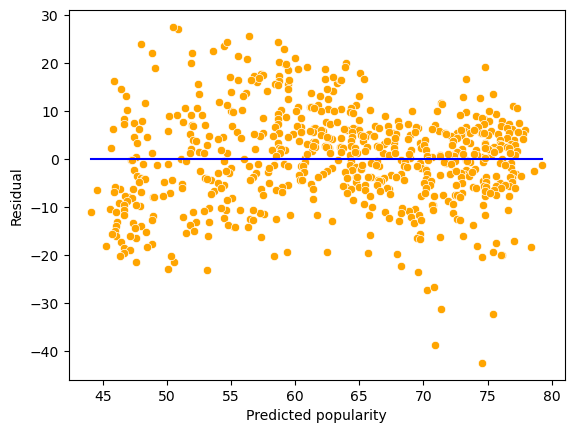

In [19]:
sns.scatterplot(x=model.fittedvalues, y=model.resid, color='orange')
sns.lineplot(x=[pred_pop.min(),pred_pop.max()], y=[0,0],color='blue')
plt.xlabel('Predicted popularity')
plt.ylabel('Residual')
plt.show()

# Classification

Because of the issues with the genre in the spotify scraped data, we decided to pivot to classification of popularity

In [21]:
# looking at pop songs
pop_songs = pd.read_csv('API Scraping Data/pop2000_2023.csv')

In [22]:
pop_songs.head()

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,100,2000,pop,0.707,0.681,0,-4.325,1,0.0668,0.0632,...,0.0322,0.646,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4
1,92,2000,pop,0.644,0.728,8,-5.750,1,0.0351,0.0543,...,0.1610,0.430,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4
2,92,2000,pop,0.644,0.735,8,-5.747,1,0.0391,0.0521,...,0.1610,0.418,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4
3,90,2000,pop,0.684,0.607,11,-8.127,0,0.1000,0.0267,...,0.1910,0.498,81.001,audio_features,0JXXNGljqupsJaZsgSbMZV,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://api.spotify.com/v1/tracks/0JXXNGljqups...,https://api.spotify.com/v1/audio-analysis/0JXX...,195373,4
4,89,2000,pop,0.561,0.520,11,-9.342,0,0.2440,0.0503,...,0.3550,0.424,153.150,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3


In [ ]:
# checking pop songs

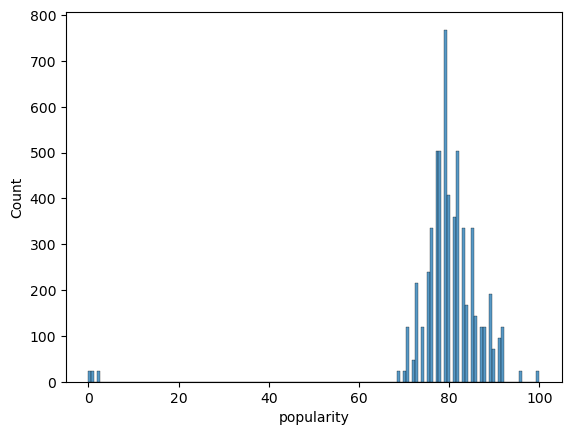

In [29]:
sns.histplot(x='popularity', data=pop_songs)
plt.xlabel('popularity')
plt.show()

In [27]:
pop_songs[pop_songs['popularity'] < 20].shape[0]

72

In [28]:
pop_songs.shape[0]

6000

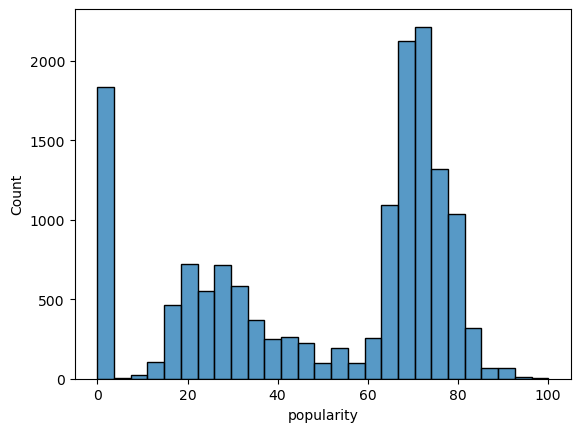

In [31]:
# actual spotify data
sns.histplot(x='popularity',data=spotify_data)
plt.xlabel('popularity')
plt.show()

In [36]:
spotify_data[spotify_data['popularity'] < 50].shape[0]

6126

In [37]:
spotify_data[spotify_data['popularity'] >= 50].shape[0]

8864

In [41]:
pop_songs.corrwith(pop_songs['popularity']).sort_values(ascending=False)

popularity          1.000000e+00
key                 9.192341e-02
loudness            8.041743e-02
acousticness        5.709309e-02
mode                5.099369e-02
tempo               4.188927e-02
energy              7.249566e-03
year                9.122229e-17
danceability       -3.143335e-02
instrumentalness   -3.884534e-02
liveness           -3.917200e-02
valence            -4.200685e-02
duration_ms        -5.101235e-02
time_signature     -6.535569e-02
speechiness        -1.438142e-01
dtype: float64

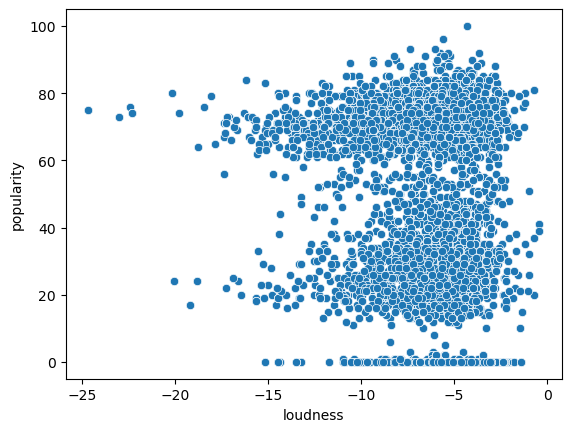

In [44]:
sns.scatterplot(x='loudness',y='popularity', data=spotify_data)
plt.show()

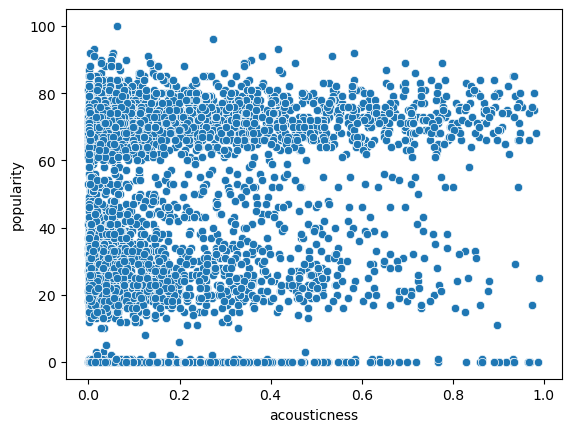

In [45]:
sns.scatterplot(x='acousticness',y='popularity', data=spotify_data)
plt.show()